#### Vectorized solution

In [4]:
import numpy as np
from pymoo.model.problem import Problem

class MyProblem(Problem):

    def __init__(self):
        super().__init__(n_var=2,
                         n_obj=2,
                         n_constr=2,
                         xl=np.array([-2,-2]),
                         xu=np.array([2,2]))

    def _evaluate(self, X, out, *args, **kwargs):
        f1 = X[:,0]**2 + X[:,1]**2
        f2 = (X[:,0]-1)**2 + X[:,1]**2

        g1 = 2*(X[:, 0]-0.1) * (X[:, 0]-0.9) / 0.18
        g2 = - 20*(X[:, 0]-0.4) * (X[:, 0]-0.6) / 4.8

        out["F"] = np.column_stack([f1, f2])
        out["G"] = np.column_stack([g1, g2])


vectorized_problem = MyProblem()

#### Elementwise

In [6]:
import numpy as np
from pymoo.util.misc import stack
from pymoo.model.problem import Problem

class MyProblem(Problem):

    def __init__(self):
        super().__init__(n_var=2,
                         n_obj=2,
                         n_constr=2,
                         xl=np.array([-2,-2]),
                         xu=np.array([2,2]),
                         elementwise_evaluation=True)

    def _evaluate(self, x, out, *args, **kwargs):
        f1 = x[0]**2 + x[1]**2
        f2 = (x[0]-1)**2 + x[1]**2

        g1 = 2*(x[0]-0.1) * (x[0]-0.9) / 0.18
        g2 = - 20*(x[0]-0.4) * (x[0]-0.6) / 4.8

        out["F"] = [f1, f2]
        out["G"] = [g1, g2]


elementwise_problem = MyProblem()

#### By Function


In [7]:
import numpy as np
from pymoo.model.problem import FunctionalProblem

objs = [
    lambda x: x[0]**2 + x[1]**2,
    lambda x: (x[0]-1)**2 + x[1]**2
]

constr_ieq = [
    lambda x: 2*(x[0]-0.1) * (x[0]-0.9) / 0.18,
    lambda x: - 20*(x[0]-0.4) * (x[0]-0.6) / 4.8
]

functional_problem = FunctionalProblem(2,
                                       objs,
                                       constr_ieq=constr_ieq,
                                       xl=np.array([-2,-2]),
                                       xu=np.array([2,2]))

In [17]:
from pymoo.util.misc import stack

def func_pf(flatten=True, **kwargs):
        f1_a = np.linspace(0.1**2, 0.4**2, 100)
        f2_a = (np.sqrt(f1_a) - 1)**2

        f1_b = np.linspace(0.6**2, 0.9**2, 100)
        f2_b = (np.sqrt(f1_b) - 1)**2

        a, b = np.column_stack([f1_a, f2_a]), np.column_stack([f1_b, f2_b])
        return stack(a, b, flatten=flatten)

def func_ps(flatten=True, **kwargs):
        x1_a = np.linspace(0.1, 0.4, 50)
        x1_b = np.linspace(0.6, 0.9, 50)
        x2 = np.zeros(50)

        a, b = np.column_stack([x1_a, x2]), np.column_stack([x1_b, x2])
        return stack(a,b, flatten=flatten)

In [18]:
import numpy as np
from pymoo.util.misc import stack
from pymoo.model.problem import Problem

class MyTestProblem(MyProblem):

    def _calc_pareto_front(self, *args, **kwargs):
        return func_pf(**kwargs)

    def _calc_pareto_set(self, *args, **kwargs):
        return func_ps(**kwargs)

test_problem = MyTestProblem()

In [19]:
from pymoo.model.problem import FunctionalProblem


functional_test_problem = FunctionalProblem(2,
                                            objs,
                                            constr_ieq=constr_ieq,
                                            xl=-2,
                                            xu=2,
                                            func_pf=func_pf,
                                            func_ps=func_ps
                                            )

In [20]:
problem = test_problem

In [21]:
from pymoo.factory import get_problem
zdt1 = get_problem("zdt1")

In [22]:
from pymoo.algorithms.nsga2 import NSGA2
from pymoo.factory import get_sampling, get_crossover, get_mutation

algorithm = NSGA2(
    pop_size=40,
    n_offsprings=10,
    sampling=get_sampling("real_random"),
    crossover=get_crossover("real_sbx", prob=0.9, eta=15),
    mutation=get_mutation("real_pm", eta=20),
    eliminate_duplicates=True
)

In [28]:
from pymoo.factory import get_termination

termination = get_termination("n_gen", 40)

In [29]:
from pymoo.optimize import minimize

res = minimize(problem,
               algorithm,
               termination,
               seed=1,
               save_history=True,
               verbose=True)

n_gen |  n_eval |   cv (min)   |   cv (avg)   |     igd      |      gd      |      hv     
    1 |      40 |  0.00000E+00 |  2.36399E+01 |  0.355456661 |  0.005362269 |  0.259340233
    2 |      50 |  0.00000E+00 |  1.15486E+01 |  0.355456661 |  0.005362269 |  0.259340233
    3 |      60 |  0.00000E+00 |  5.277918607 |  0.355456661 |  0.005362269 |  0.259340233
    4 |      70 |  0.00000E+00 |  2.406068542 |  0.336177786 |  0.003791374 |  0.267747228
    5 |      80 |  0.00000E+00 |  0.908316880 |  0.146187673 |  0.030825699 |  0.326821728
    6 |      90 |  0.00000E+00 |  0.264746300 |  0.146187673 |  0.030825699 |  0.326821728
    7 |     100 |  0.00000E+00 |  0.054063822 |  0.127166639 |  0.048434536 |  0.326821728
    8 |     110 |  0.00000E+00 |  0.003060876 |  0.116635438 |  0.040756917 |  0.333328216
    9 |     120 |  0.00000E+00 |  0.00000E+00 |  0.114104403 |  0.033780540 |  0.333467251
   10 |     130 |  0.00000E+00 |  0.00000E+00 |  0.113905849 |  0.079757906 |  0.336916611

In [25]:
import copy

# perform a copy of the algorithm to ensure reproducibility
obj = copy.deepcopy(algorithm)

# let the algorithm know what problem we are intending to solve and provide other attributes
obj.setup(problem, termination=termination, seed=1)

# until the termination criterion has not been met
while obj.has_next():

    # perform an iteration of the algorithm
    obj.next()

    # access the algorithm to print some intermediate outputs
    print(f"gen: {obj.n_gen} n_nds: {len(obj.opt)} constr: {obj.opt.get('CV').min()} ideal: {obj.opt.get('F').min(axis=0)}")

# finally obtain the result object
result = obj.result()

gen: 1 n_nds: 1 constr: 0.0 ideal: [0.43280594 0.12244878]
gen: 2 n_nds: 1 constr: 0.0 ideal: [0.43280594 0.12244878]
gen: 3 n_nds: 1 constr: 0.0 ideal: [0.43280594 0.12244878]
gen: 4 n_nds: 2 constr: 0.0 ideal: [0.43280594 0.09718357]
gen: 5 n_nds: 3 constr: 0.0 ideal: [0.13614243 0.09718357]
gen: 6 n_nds: 3 constr: 0.0 ideal: [0.13614243 0.09718357]
gen: 7 n_nds: 4 constr: 0.0 ideal: [0.13614243 0.08467286]
gen: 8 n_nds: 5 constr: 0.0 ideal: [0.02736815 0.08467286]
gen: 9 n_nds: 6 constr: 0.0 ideal: [0.02347838 0.08420915]
gen: 10 n_nds: 6 constr: 0.0 ideal: [0.02317765 0.08420915]
gen: 11 n_nds: 7 constr: 0.0 ideal: [0.02317765 0.08420915]
gen: 12 n_nds: 7 constr: 0.0 ideal: [0.02317765 0.08420915]
gen: 13 n_nds: 7 constr: 0.0 ideal: [0.02317765 0.08420915]
gen: 14 n_nds: 9 constr: 0.0 ideal: [0.02317765 0.05440163]
gen: 15 n_nds: 10 constr: 0.0 ideal: [0.02317765 0.05440163]
gen: 16 n_nds: 11 constr: 0.0 ideal: [0.02317765 0.0166032 ]
gen: 17 n_nds: 14 constr: 0.0 ideal: [0.0231776

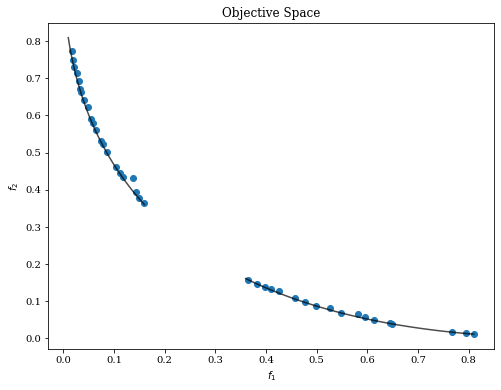

In [30]:
from pymoo.visualization.scatter import Scatter

# get the pareto-set and pareto-front for plotting
ps = problem.pareto_set(use_cache=False, flatten=False)
pf = problem.pareto_front(use_cache=False, flatten=False)

# Design Space
plot = Scatter(title = "Design Space", axis_labels="x")
plot.add(res.X, s=30, facecolors='none', edgecolors='r')
if ps is not None:
    plot.add(ps, plot_type="line", color="black", alpha=0.7)
plot.do()
plot.apply(lambda ax: ax.set_xlim(-0.5, 1.5))
plot.apply(lambda ax: ax.set_ylim(-2, 2))
plot.show()

# Objective Space
plot = Scatter(title = "Objective Space")
plot.add(res.F)
if pf is not None:
    plot.add(pf, plot_type="line", color="black", alpha=0.7)
plot.show()